##                                           Table Talk: Exploring User Engagement for Restaurant Success

### Yelp Dataset Download and Load

In [1]:
import pandas as pd
import json
from sqlalchemy import create_engine


In [2]:
#Load JSON data into DataFrames

import json
import pandas as pd

# Load business data
with open(r'C:\Users\acer\Downloads\archive (16)\yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = [json.loads(line) for line in f]
business_df = pd.DataFrame(business_data)

# Load checkin data    
with open(r'C:\Users\acer\Downloads\archive (16)\yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    checkin_data = [json.loads(line) for line in f]
checkin_df = pd.DataFrame(checkin_data)

# Load review data
with open(r'C:\Users\acer\Downloads\archive (16)\yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    review_data = [json.loads(line) for line in f]
review_df = pd.DataFrame(review_data)

# Load tip data
with open(r'C:\Users\acer\Downloads\archive (16)\yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    tip_data = [json.loads(line) for line in f]
tip_df = pd.DataFrame(tip_data)

# Load tip data
with open(r'C:\Users\acer\Downloads\archive (16)\yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    user_data = [json.loads(line) for line in f]
user_df = pd.DataFrame(user_data)


In [3]:
# Print shapes of DataFrames

print(business_df.shape)
print(checkin_df.shape)
print(review_df.shape)
print(tip_df.shape)
print(user_df.shape)

(150346, 14)
(131930, 2)
(6990280, 9)
(908915, 5)
(1987897, 22)


### Clean and Save DataFrames to SQLite Database

In [4]:
business_df.drop(['attributes','hours'],axis=1, inplace=True)

In [5]:
# Create SQLite engine
engine = create_engine('sqlite:///yelp.db')

# Function to load DataFrame into SQLite database
def load_dataframe(df,table_name,engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

# Load each DataFrame into the SQLite database
load_dataframe(business_df,'business',engine)
load_dataframe(checkin_df,'checkin',engine)
load_dataframe(review_df,'review',engine)
load_dataframe(tip_df,'tip',engine)
load_dataframe(user_df,'user',engine)


### Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
!pip install folium
import folium
!pip install geopy
from  geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Connect to SQLite Database
conn = sqlite3.connect('yelp.db')

### Explore what type of Data available in tables

In [10]:
tables = pd.read_sql_query("Select name from sqlite_master where type = 'table'",conn)
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [11]:
for table in tables ['name']:
          display(pd.read_sql_query(f"select * from {table} limit 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


### How many business are restaurant and they are actually open ?

In [13]:
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%'and is_open = 1""",conn)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


### what is the descriptive stats(avg, max, min, median) for review count and star rating for business?


In [14]:
pd.read_sql_query(f"""SELECT 
        AVG(review_count) AS avg_review_count,
        MAX(review_count) AS max_review_count,
        MIN(review_count) AS min_review_count,
        (SELECT review_count 
         FROM business 
         ORDER BY review_count 
         LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)) AS median_review_count,

        AVG(stars) AS avg_star_rating,
        MAX(stars) AS max_star_rating,
        MIN(stars) AS min_star_rating,
        (SELECT stars
         FROM business 
         ORDER BY stars 
         LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)) AS median_stars_rating
         FROM business 
        WHERE business_id IN {tuple (business_id['business_id'])}
        """,conn).transpose()

,0
avg_review_count,104.097789
max_review_count,7568.000000
min_review_count,5.000000
median_review_count,15.000000
avg_star_rating,3.523969
max_star_rating,5.000000
min_star_rating,1.000000
median_stars_rating,3.500000


### Conclusion:
#### For review counts, significant outliers are likely due to the large difference between the mean (104.10) and median (15). Removing these outliers could provide a more accurate representation of the typical review count. For star ratings, the distribution appears normal with the mean (3.52) and median (3.5) being close. Outliers may not be crucial to remove unless further analysis identifies specific problematic data points.

### Recommendation:
#### Remove outliers for review counts to avoid skewed analyses. For star ratings, it may not be necessary unless specific outliers are identified.

In [15]:
# function to remove outliers

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [16]:
business_id = remove_outliers(business_id,'review_count')
print(business_id)

                  business_id  review_count
0      MTSW4McQd7CbVtyjqoe9mw            80
1      CF33F8-E6oudUQ46HnavjQ             6
2      bBDDEgkFA1Otx9Lfe7BZUQ            10
3      eEOYSgkmpB90uNA7lDOMRA            10
4      il_Ro8jwPlHresjw9EGmBg            28
...                       ...           ...
34998  sf_oQ62L8UEnOOLf00nNGA             6
35000  l9eLGG9ZKpLJzboZq-9LRQ            11
35001  cM6V90ExQD6KMSU3rRB5ZA            33
35002  WnT9NIzQgLlILjPT0kEcsQ            35
35003  2O2K6SXPWv56amqxCECd4w            14

[31537 rows x 2 columns]


In [17]:
pd.read_sql_query(f"""SELECT 
        AVG(review_count) AS avg_review_count,
        MAX(review_count) AS max_review_count,
        MIN(review_count) AS min_review_count,
        (SELECT review_count 
         FROM business 
         ORDER BY review_count 
         LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)) AS median_review_count,

        AVG(stars) AS avg_star_rating,
        MAX(stars) AS max_star_rating,
        MIN(stars) AS min_star_rating,
        (SELECT stars
         FROM business 
         ORDER BY stars 
         LIMIT 1 OFFSET (SELECT COUNT(*) / 2 FROM business)) AS median_stars_rating
         FROM business 
        WHERE business_id IN {tuple (business_id['business_id'])}
        """,conn).transpose()

,0
avg_review_count,55.975426
max_review_count,248.000000
min_review_count,5.000000
median_review_count,15.000000
avg_star_rating,3.477281
max_star_rating,5.000000
min_star_rating,1.000000
median_stars_rating,3.500000


### which restaurants have the highest number of reviews?

In [18]:
pd.read_sql_query(f"""SELECT name,
SUM(review_count) as review_count,
AVG(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])}
group by name
order by review_count desc
limit 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


### which restaurants have the highest number of ratings?

In [19]:
pd.read_sql_query(f""" select name, sum(review_count) as review_count, AVG(stars) as avg_rating
from business
where business_id IN {tuple (business_id['business_id'])}
group by name
order by avg_rating desc
limit 10 """,conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


### Do Restaurants with higher engagement tend to have higher ratings?

In [21]:
# Checkin_count 

pd.read_sql_query(""" SELECT business_id, 
SUM(length(date)-length(replace(date,',',''))+1) as checkin_count from checkin
group by business_id
""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [22]:
# Tip_count

pd.read_sql_query(""" SELECT business_id,
count(*) as tip_count from tip
group by business_id
""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [23]:
# combine query

review_count_df1 = pd.read_sql_query(f"""
SELECT total.avg_rating as rating,
       AVG(total.review_count) as avg_review_count,
       AVG(total.tip_count) as avg_tip_count,
       AVG(total.checkin_count) as avg_checkin_count
FROM
(
    SELECT b.business_id,
           SUM(b.review_count) AS review_count,
           AVG(b.stars) AS avg_rating,
           SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
           SUM(tip.tip_count) as tip_count
    FROM business b
    LEFT JOIN checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
    (
        SELECT business_id, COUNT(business_id) as tip_count 
        FROM tip 
        GROUP BY business_id 
        ORDER BY tip_count
    ) as tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id
) as total
GROUP BY total.avg_rating
""", conn)


### Visualize the Engagement using matplotlib

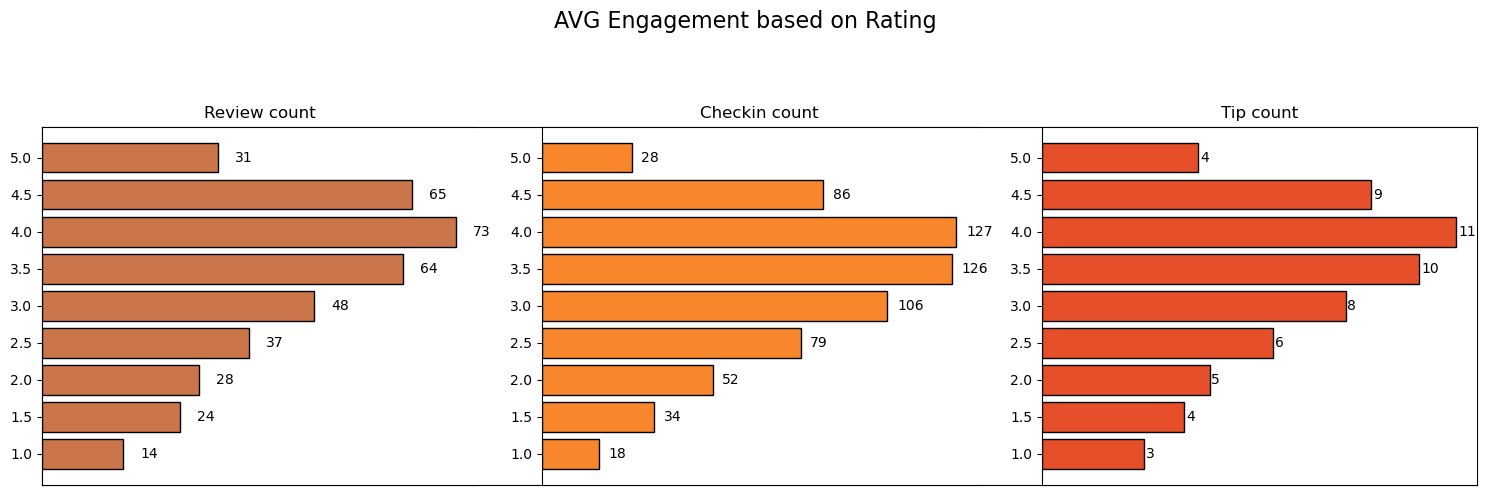

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.suptitle('AVG Engagement based on Rating\n\n', fontsize=16)
plt.yticks([])  # Remove y-axis ticks for all subplots
plt.xticks([])  # Remove x-axis ticks for all subplots

# Plotting Review Count
plt.subplot(1, 3, 1)
plt.title('Review count')
plt.barh(review_count_df1['rating'].astype('str'), review_count_df1['avg_review_count'], edgecolor='k', color='#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df1['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')
plt.xticks([])  # Remove x-axis ticks

# Plotting Checkin Count
plt.subplot(1, 3, 2)
plt.title('Checkin count')
plt.barh(review_count_df1['rating'].astype('str'), review_count_df1['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df1['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')
plt.xticks([])  # Remove x-axis ticks

# Plotting Tip Count
plt.subplot(1, 3, 3)
plt.title('Tip count')
plt.barh(review_count_df1['rating'].astype('str'), review_count_df1['avg_tip_count'], edgecolor='k', color='#E54F29')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df1['avg_tip_count']):
    plt.text(value + 0.05, i, str(round(value)), color='black', va='center')
plt.xticks([])  # Remove x-axis ticks

plt.tight_layout()
plt.show()


### Is any correlation between no of reviews, tips and check_ins for business?

In [26]:
 Engagement_df = pd.read_sql_query(f"""
    SELECT b.business_id,
           SUM(b.review_count) AS review_count,
           AVG(b.stars) AS avg_rating,
           SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
           SUM(tip.tip_count) as tip_count,
           (CASE WHEN b.stars >=3.5 Then 'High-Rated'  Else 'Low-Rated' END) as category
    FROM business b
    LEFT JOIN checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
    (
        SELECT business_id, COUNT(business_id) as tip_count 
        FROM tip 
        GROUP BY business_id 
        ORDER BY tip_count
    ) as tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id

""", conn).dropna()


In [27]:
Engagement_df [['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


### Insights from Correlation Matrix
### Observations:
#### Review Count and Check-in Count: Moderately strong positive correlation (0.63). Higher reviews tend to coincide with more check-ins.
#### Review Count and Tip Count: Strong positive correlation (0.77). More reviews are associated with more tips.
#### Check-in Count and Tip Count: Strong positive correlation (0.77). More check-ins are associated with more tips.
### Summary:
#### Higher user engagement in one area (reviews, check-ins, or tips) tends to correlate with higher engagement in the others.

### Is there is any difference in the user engagement between high rated and low rated ?

In [28]:
pd.read_sql_query(f"""
    SELECT b.business_id,
           SUM(b.review_count) AS review_count,
           AVG(b.stars) AS avg_rating,
           SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
           SUM(tip.tip_count) as tip_count,
           (CASE WHEN b.stars >=3.5 Then 'High-Rated'  Else 'Low-Rated' END) as category
    FROM business b
    LEFT JOIN checkin cc ON b.business_id = cc.business_id
    LEFT JOIN 
    (
        SELECT business_id, COUNT(business_id) as tip_count 
        FROM tip 
        GROUP BY business_id 
        ORDER BY tip_count
    ) as tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id

""", conn).dropna()


,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,High-Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,Low-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,Low-Rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,Low-Rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,Low-Rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,Low-Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,High-Rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,High-Rated


In [29]:
Engagement_df.groupby("category")[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,72.291062,122.066641,10.162766
Low-Rated,42.123420,88.880828,6.541689


### Formula to calculate the success score based on avg rating and total review count

In [31]:
# function to calculate success score

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] +1)
        success_score.append(score)
    return success_score    

In [32]:
# How success matrics of restaurants vary across different states and cities?

city_df = pd.read_sql_query(f""" select city, state, latitude, longitude, AVG(stars) as avg_rating, Sum(review_count) as review_count,
count(*) as restaurant_count from business
WHERE business_id IN {tuple(business_id['business_id'])}
group by state, city
order by review_count desc
limit 10""", conn)

In [33]:
city_df['success_score'] = calculate_success_metric(city_df)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


### Visulize the success matrics of restaurants vary across different states and cities using folium libarary

In [34]:
# create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

#define a color scale 
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                     vmax=city_df['success_score'].max())

#add marker to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'],row['longitude']],
        radius=5,
        color= color_scale(row['success_score']),
        fill = True,
        fill_color = color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

m.add_child(color_scale)

### Are there any seasonal and year trend in user engagement for restaurant?

#### High Rated Engagement Query

In [38]:
high_rated_engagement = pd.read_sql_query(f"""
    SELECT review.month_year, review.review_count, tip.tip_count
    FROM
    (
        SELECT strftime('%Y-%m', date) AS month_year, COUNT(*) AS review_count 
        FROM review 
        WHERE business_id IN {tuple(business_id['business_id'])} AND stars >= 3.5
        GROUP BY month_year 
        ORDER BY month_year
    ) AS review
    JOIN
    (
        SELECT strftime('%Y-%m', tip.date) AS month_year, COUNT(*) AS tip_count
        FROM tip
        JOIN business AS b ON tip.business_id = b.business_id
        WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars >= 3.5
        GROUP BY month_year 
        ORDER BY month_year
    ) AS tip
    ON review.month_year = tip.month_year
""", conn)


#### Low Rated Engagement Query

In [41]:
low_rated_engagement = pd.read_sql_query(f"""
    SELECT review.month_year, review.review_count, tip.tip_count
    FROM
    (
        SELECT strftime('%Y-%m', date) AS month_year, COUNT(*) AS review_count 
        FROM review 
        WHERE business_id IN {tuple(business_id['business_id'])} AND stars < 3.5
        GROUP BY month_year 
        ORDER BY month_year
    ) AS review
    JOIN
    (
        SELECT strftime('%Y-%m', tip.date) AS month_year, COUNT(*) AS tip_count
        FROM tip
        JOIN business AS b ON tip.business_id = b.business_id
        WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars < 3.5
        GROUP BY month_year 
        ORDER BY month_year
    ) AS tip
    ON review.month_year = tip.month_year
""", conn)


In [45]:
print("High Rated Engagement Data:\n", high_rated_engagement)
print("\nLow Rated Engagement Data:\n", low_rated_engagement)


High Rated Engagement Data:
     month_year  review_count  tip_count
0      2009-04           544          9
1      2009-05           575         14
2      2009-06           652         19
3      2009-07           707         16
4      2009-08           757         17
..         ...           ...        ...
149    2021-09         11748       1017
150    2021-10         12939       1091
151    2021-11         11854       1021
152    2021-12         12652        652
153    2022-01          8221        328

[154 rows x 3 columns]

Low Rated Engagement Data:
     month_year  review_count  tip_count
0      2009-04           351          3
1      2009-05           350          9
2      2009-06           332          5
3      2009-07           429          4
4      2009-08           442          6
..         ...           ...        ...
149    2021-09          6699        184
150    2021-10          6974        197
151    2021-11          6326        197
152    2021-12          6937        12

In [53]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating 
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} 
GROUP BY month_year
ORDER BY month_year;""", conn)

In [54]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [68]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values("month_year", inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017-1']

high_rated_engagement ['month_year'] = pd.to_datetime(high_rated_engagement ['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement ['month_year']>'2017']

low_rated_engagement ['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement [low_rated_engagement [ 'month_year']>'2017']

In [71]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

### Visualize with help of matplotlib

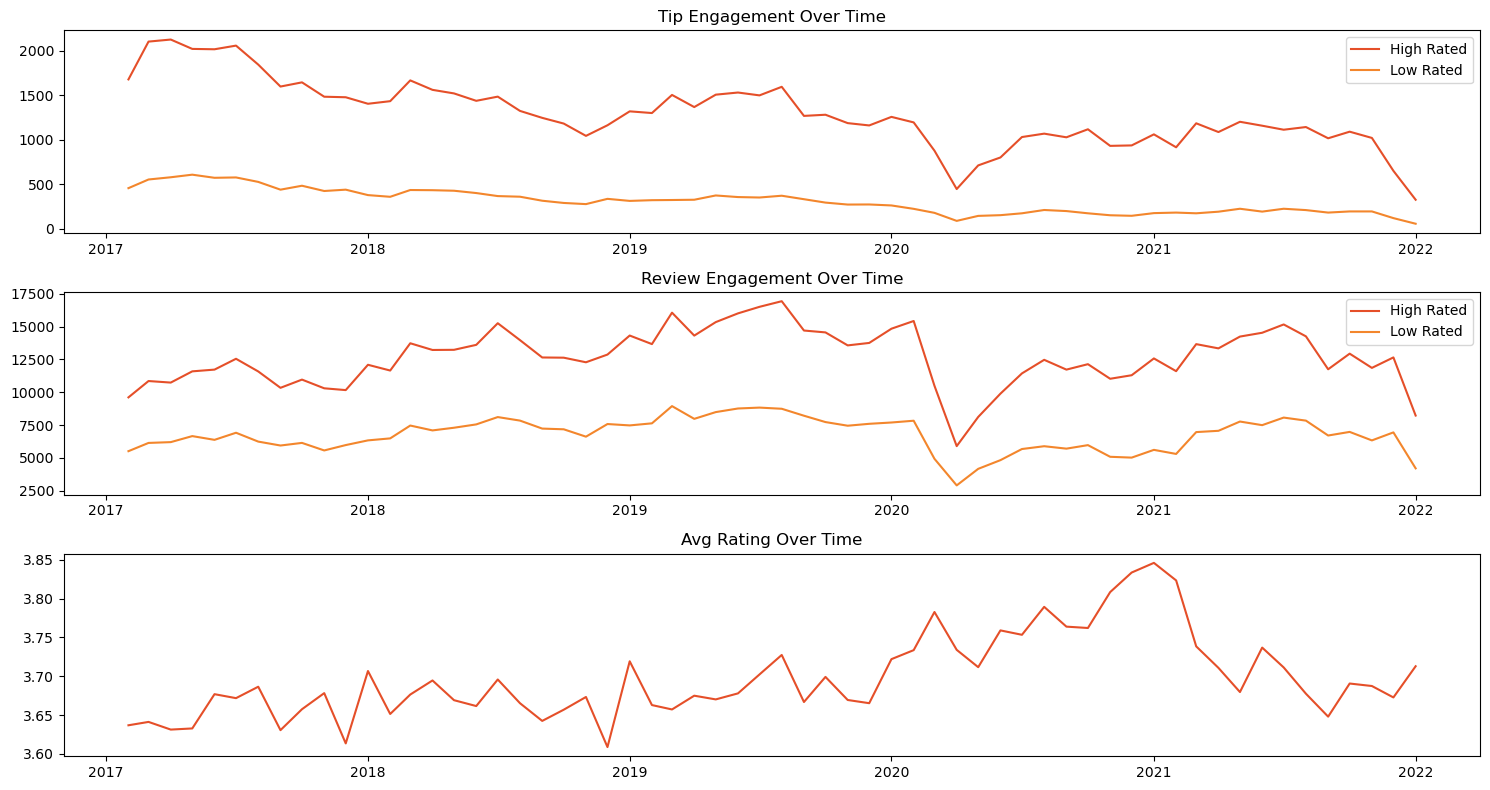

In [73]:
plt.figure(figsize=(15, 8))

# Tip Engagement Over Time
plt.subplot(3, 1, 1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low Rated', color='#F3862C')
plt.legend()

# Review Engagement Over Time
plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated', color='#F3862C')
plt.legend()

# Avg Rating Over Time (Sample Data)
plt.subplot(3, 1, 3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#E54F29')

plt.tight_layout()
plt.show()

In [ ]:
tip_high_rated = high_rated_engagement [['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement [['month_year', 'review_count']].set_index('month_year') 
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

### Is there any differnce in engagement of elite users and non elite users?

In [ ]:
elite df = pd.read_sql_query("""SELECT
           elite,
           COUNT(*) AS row_count,
           SUM(review_count) AS total_review_count
from
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite' 
            ELSE 'Elite'
        END AS elite,
        u.review_count
    from
        user u) AS user_elite
GROUP BY
    elite;
""", conn)

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.ple(elite_df['num_users'], labels = elite_dfl'elite'l, autopct=%.2f', startangle 188, colors [#E54F29', '#F886201]

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.ple(elite_df [total_review_count'], labels = elite_df('elite'], autopct=%.2f", startangle 90, colors [#E54F29', '#F3862C"])
plt.show()

### What are the busiest hours for restaurants?

In [ ]:
review_engagement = pd.read_sql_query("""SELECT 
  cast (strftime('%H',date) as integer) 
  as hour,
  COUNT(*) AS review_count
FROM
  review
GROUP BY 
  hour; 
""",conn)

tip_engagement = pd.read_sql_query("""SELECT 
    cast (strftime('H', date) as integer)
    as hour,
    COUNT(*) AS tip_count
FROM
    tip 
GROUP BY 
    hour;
""",conn)

checkin pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin ['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-::S").strftime("H") for j in i.split(',')])
checkin_engagement = pd. DataFrame(checkin_engagement).astype('int').groupby(0) [[8]].count()

### Visualize 

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement ['hour'], tip_engagement ['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement('hour'], review_engagement['review_count'], color = '#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement [0], color = '#CB7548')
plt.tight_layout()
plt.show()